In [0]:
import sys, tweepy
import textblob
import re

import matplotlib.pyplot as plt
import pandas as pd

import twint
from googletrans import Translator



In [2]:
pip install twint

In [3]:
pip install googletrans

In [0]:
#define some function
def percent(part, total):
    return 100*float(part)/float(total)

In [7]:
#input keyword and desired number of tweets , prepare csv
keyword = "indonesia" #str(input("Please input keyword: "))
number = "20" #int(input("Number of tweets: "))
date_end  = "2019-11-23"#str(input("end date (yyyy-mm-dd ):"))
date_start  = "2019-11-20"#str(input("start date (yyyy-mm-dd ):"))

c = twint.Config()
c.Until = date_end
c.Since = date_start
c.Search = keyword
c.Lang = "id"
c.Pandas_clean = True
c.Debug = True
c.Limit = number
c.Pandas = True
c.Count = True
c.Hide_output = True
c.Filter_retweets = True

twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df

Please input keyword: malaysia
Number of tweets: 20
end date (yyyy-mm-dd ):2019-11-23
start date (yyyy-mm-dd ):2019-11-20
[+] Finished: Successfully collected 20 Tweets.


In [0]:
import emoji

def clean_emoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

In [0]:
def sentimentlysis(string):
  string = clean_emoji(string)
  string = Translator().translate(str(string), dest='en')

  analysis = textblob.TextBlob(string.text)

  sentiment = ""
  if(analysis.sentiment.polarity==0):
        sentiment = "neutral"
  elif(analysis.sentiment.polarity<0.0000):
        sentiment = "negative"
  elif(analysis.sentiment.polarity>0.0000):
        sentiment = "positive"
  return sentiment


<function matplotlib.pyplot.show>

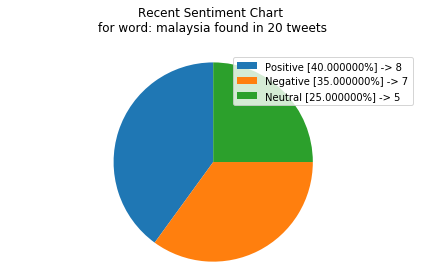

In [56]:
sentiment_analysis = [sentimentlysis(x) for x in Tweets_df['tweet']]

perPositive = format(percent(sentiment_analysis.count("positive"), int(Tweets_df.shape[0])),'02f')
perNegative = format(percent(sentiment_analysis.count("negative"), int(Tweets_df.shape[0])),'02f')
perNeutral = format(percent(sentiment_analysis.count("neutral"), int(Tweets_df.shape[0])),'02f')

sizes = [perPositive, perNegative, perNeutral]
labels = ['Positive ['+str(perPositive)+'%] -> '+str(sentiment_analysis.count("positive")) ,'Negative ['+str(perNegative)+'%] -> '+str(sentiment_analysis.count("negative")) ,'Neutral [' +str(perNeutral)+ '%] -> '+str( sentiment_analysis.count("neutral"))]
p, t = plt.pie(sizes, startangle=90)
plt.title("Recent Sentiment Chart \nfor word: "+keyword+" found in "+str(int(Tweets_df.shape[0]))+ " tweets\n")
plt.axis("equal")
plt.legend(p, labels,loc="best")
plt.tight_layout()
plt.show